# Logistic Regression

In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('data/transformed_data_num.csv', index_col=0)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
data.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,year,month,weekday,neutralized,ColorMix,BreedMix,apricot,...,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wolfhound,yorkshire,OutcomeType
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.090683,0.333333,0.090909,0.333333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Return_to_owner
1,0.0,1.0,0.090683,0.000000,0.818182,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Euthanasia
2,1.0,0.0,0.181614,0.666667,0.000000,0.833333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adoption
3,0.0,0.0,0.004997,0.333333,0.545455,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Transfer
4,1.0,0.0,0.181614,0.000000,0.909091,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Transfer


In [23]:
data.OutcomeType.value_counts()

Adoption           10574
Transfer            8292
Return_to_owner     4426
Euthanasia          1304
Died                 168
Name: OutcomeType, dtype: int64

In [24]:
data_ml = data
data_ml = data_ml.dropna()
data_ml["OutcomeType"] = (data_ml["OutcomeType"] == "Adoption").astype(np.int) # if adopted 1 else 0
data_ml.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,year,month,weekday,neutralized,ColorMix,BreedMix,apricot,...,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wolfhound,yorkshire,OutcomeType
AnimalID,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.090683,0.333333,0.090909,0.333333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.090683,0.000000,0.818182,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.181614,0.666667,0.000000,0.833333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.004997,0.333333,0.545455,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,0.181614,0.000000,0.909091,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


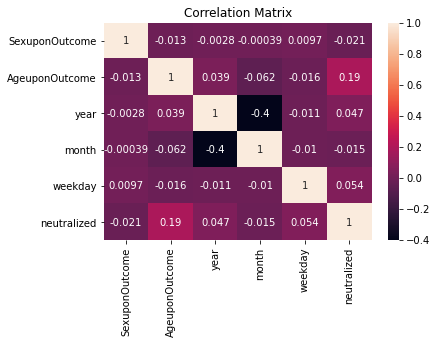

In [64]:
data_corr = data_ml[data_ml.columns[1:7]] # excluding the breed and color columns
corr_mat = data_corr.corr()
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

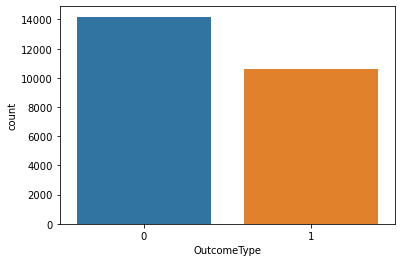

In [65]:
sns.countplot(x = "OutcomeType", data = data_ml) # pretty even distribution

In [57]:
y = data_ml["OutcomeType"]
x = data_ml.loc[:, ~data_ml.columns.isin(["OutcomeType"])]
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.33, random_state=42) # splitting in training & test data

In [58]:
log_reg = LogisticRegression(max_iter = 200)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [68]:
pred = log_reg.predict(x_test)

In [71]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      4740
           1       0.67      0.80      0.73      3433

    accuracy                           0.75      8173
   macro avg       0.75      0.75      0.75      8173
weighted avg       0.76      0.75      0.75      8173



## Confusion matrix

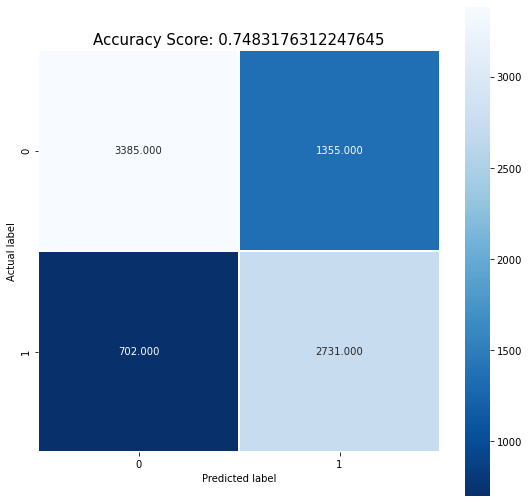

In [70]:
cm = confusion_matrix(y_test, pred)
score = log_reg.score(x_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The model still seems to have some problems with false positives - i. e. it missclassifies animals, which actually do not get adopted as adopted.

## ROC-curve

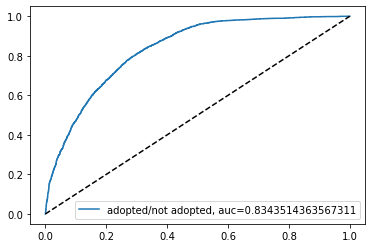

In [62]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, thresholds= metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="adopted/not adopted, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.legend(loc=4)
plt.show()